***Importing Libraries***

In [406]:
import pandas as pd #reading and formating data
import numpy as np #formating data
from scipy import stats #z-score treatment
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Analysis
import warnings #Error messages
from sklearn.preprocessing import StandardScaler #Tranform Dataframe itens in Standard Scale
from sklearn.model_selection import train_test_split #Data Partition
from sklearn.metrics import accuracy_score, classification_report #Metrics of results
from sklearn.ensemble import RandomForestClassifier as RFC #RandomForest Method
from sklearn.naive_bayes import GaussianNB #Naive Bayes Method
from sklearn.svm import SVC #Support Vector Machine Method
from sklearn.neighbors import KNeighborsClassifier as KNN #KNN Method
from sklearn.tree import DecisionTreeClassifier as DTC #Decision Tree Method

***Reading dataframe***

In [501]:
df = pd.read_csv('dataset/WineQT.csv') #Reading CSV file

In [502]:
df.head() #Print header of dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


***Data Cleaning***

In [503]:
df = df.drop(['Id'], axis =1)

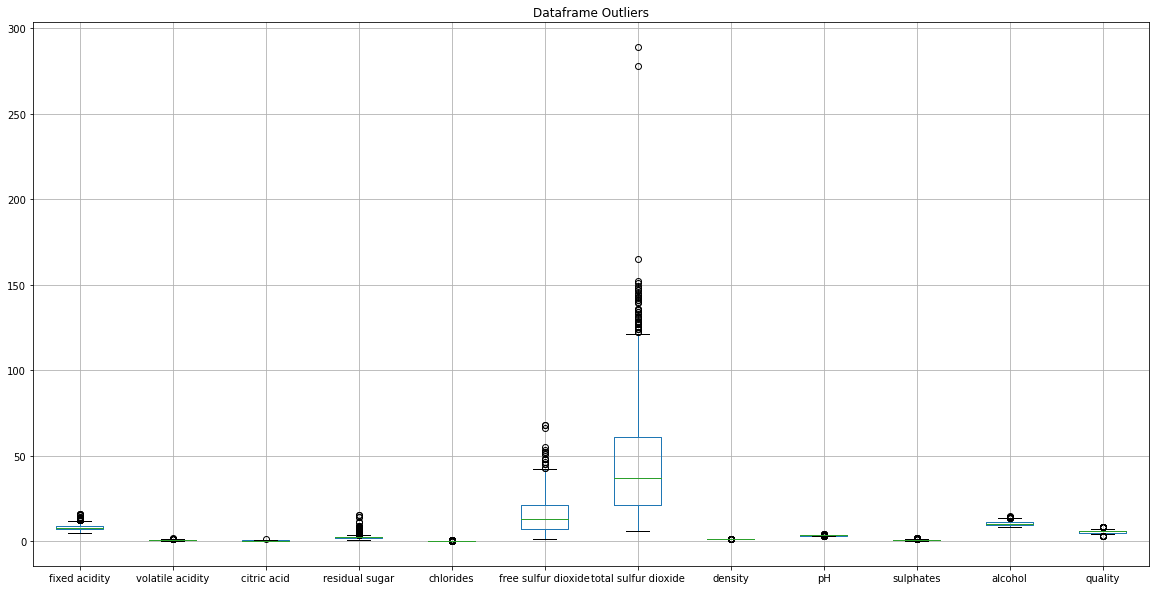

In [504]:
#Stop warnings messages
warnings.filterwarnings('ignore')
#Graphic of dataframe outliers
plt.figure(figsize = (20,10))
df.boxplot()
plt.title('Dataframe Outliers')
plt.show()

In [505]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


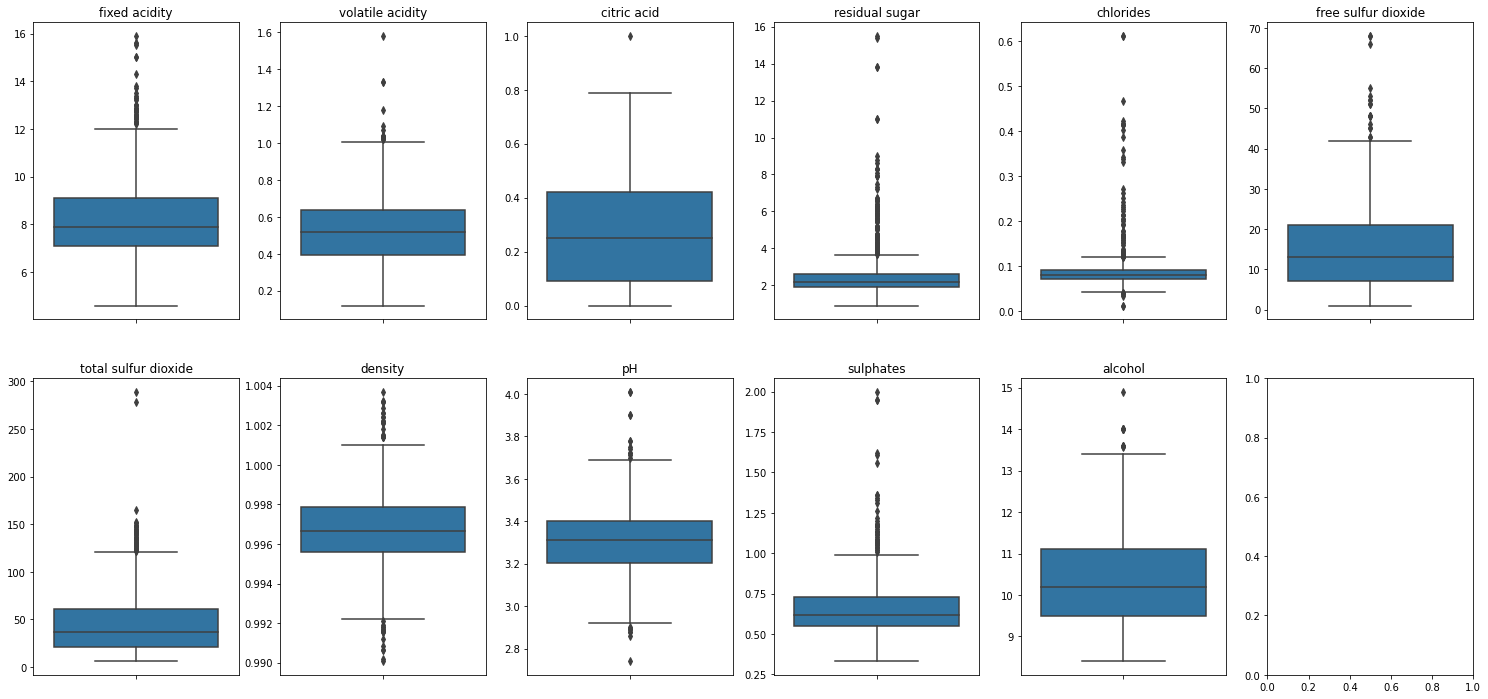

In [506]:
#Graphics by dataframe columns
nrow, ncol, cont = [2,6,0]
fig, axs = plt.subplots(nrows = nrow, ncols = ncol, figsize = (1, 12))
fig.subplots_adjust(left = 0, right = 20)
for i in range(0,nrow):
    for j in range(0, ncol):
        if cont == 11:
            break
        sns.boxplot(y=df[df.columns.values[cont]], ax = axs[i][j]).set(ylabel = None, title = df.columns.values[cont])
        cont += 1
plt.show()

In [507]:
#Using Z score to treat outliers
z = np.abs(stats.zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.521580,0.939332,1.365027,0.466421,0.231395,0.450467,0.363610,0.555854,1.270695,0.573658,0.963382,0.815724
1,0.292593,1.941813,1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,0.708928,0.130881,0.593601,0.815724
2,0.292593,1.273492,1.161568,0.171289,0.107253,0.060071,0.246745,0.140103,0.325775,0.045254,0.593601,0.815724
3,1.653789,1.399789,1.483400,0.466421,0.252560,0.135127,0.429852,0.659792,0.964363,0.456235,0.593601,0.425784
4,0.521580,0.939332,1.365027,0.466421,0.231395,0.450467,0.363610,0.555854,1.270695,0.573658,0.963382,0.815724
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1.151292,0.118842,0.703785,0.171289,0.231395,1.306316,0.180503,0.514707,0.695966,0.541862,0.515741,0.425784
1139,0.865059,0.493785,0.958109,0.466421,0.400719,1.208717,0.241539,0.114545,0.695966,0.952843,0.870937,0.425784
1140,1.208538,0.382399,0.958109,0.392638,0.064922,1.599113,0.058432,0.951246,0.887542,0.456235,0.053515,0.815724
1141,1.380278,0.103932,0.856379,0.245072,0.527712,2.282306,0.155192,0.836914,1.334554,0.600574,0.700632,0.425784


In [508]:
df = df[(z < 3).all(axis=1)]

In [509]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [510]:
df.shape

(1041, 12)

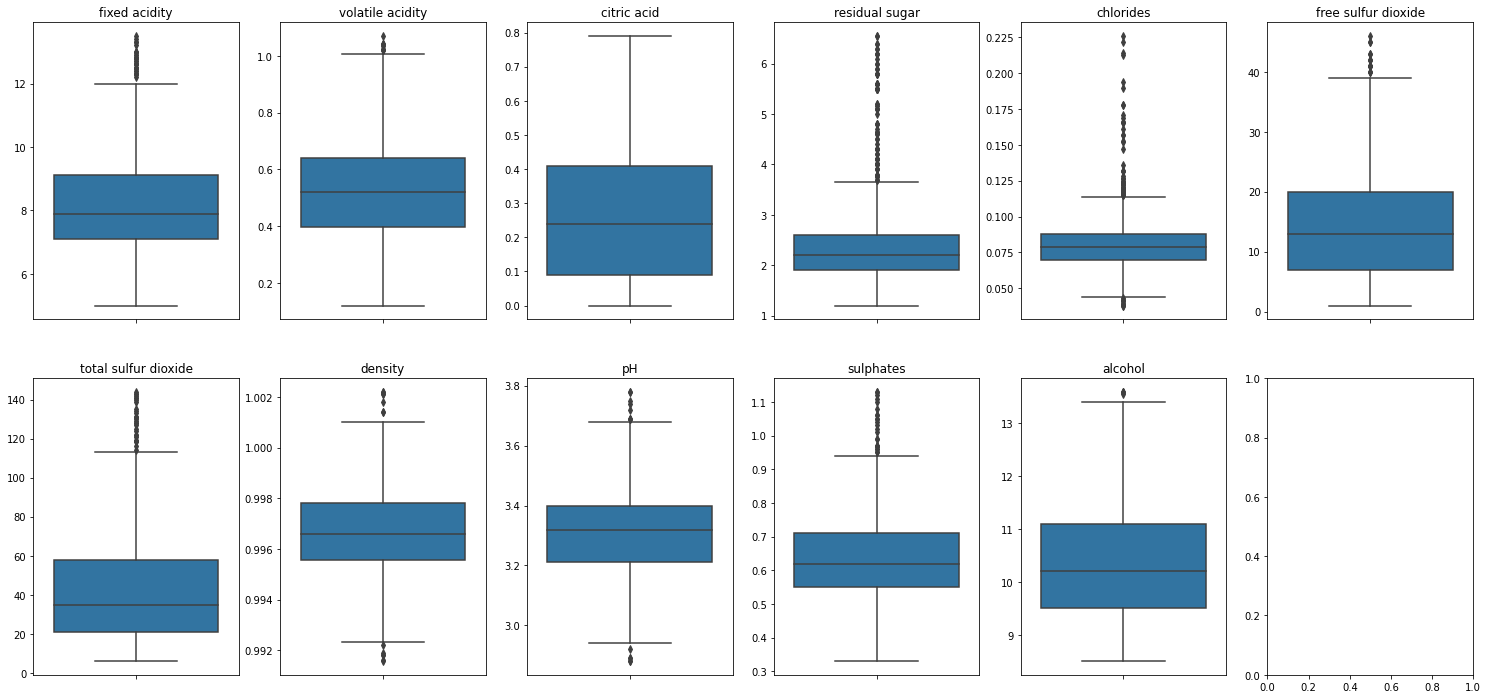

In [511]:
#Graphics by dataframe columns
nrow, ncol, cont = [2,6,0]
fig, axs = plt.subplots(nrows = nrow, ncols = ncol, figsize = (1, 12))
fig.subplots_adjust(left = 0, right = 20)
for i in range(0,nrow):
    for j in range(0, ncol):
        if cont == 11:
            break
        sns.boxplot(y=df[df.columns.values[cont]], ax = axs[i][j]).set(ylabel = None, title = df.columns.values[cont])
        cont += 1
plt.show()

The values became more concentrated.

In [512]:
#Create a new Classifier based on quality columns
#The new columns will receive 0 (low quality) or 1 (high quality, if the old quality is greater than 6.5)
bins = (2,6.5,8)
group_names = ['bad', 'good']
df['high quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [513]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [514]:
df = df.drop(['quality'], axis = 1)

In [515]:
df['high quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [516]:
df.shape

(1041, 12)

***Pre-processing***

In [517]:
#Separating values to Machine Learning Models
X = df.iloc[:,:11].values
Y = df.iloc[:,11].values

In [518]:
#Transforming x_train and x_test values in a Standard Scale
sc = StandardScaler()
X = sc.fit_transform(X)

In [519]:
#Creating train and test variables
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 58) #Split

***Machine Learning Models***

In [520]:
#Searching the best parameters on SVM Method
C = [0.1,0.2,0.3,0.6, 0.8, 0.9, 1.1, 1.2, 1.8, 2]
kernel = ['rbf', 'poly']
gamma = [0.1,0.2,0.3,0.6, 0.8, 0.9, 1.1, 1.2, 1.8, 2]

results_svm = []

for i in C:
    for j in kernel:
        for k in gamma:
            svc_model = SVC(C = i, kernel = j, gamma = k)
            svc_model.fit(x_train, y_train)
            svc_pred = svc_model.predict(x_test)
            svc_score = accuracy_score(y_test, svc_pred)
            results_svm.append([i, j, k, svc_score])

#Printing a table with the result
res_svm = pd.DataFrame(results_svm, columns = ['C', 'kernel', 'gamma', 'accuracy'])
res_svm = res_svm[res_svm['accuracy'] == res_svm['accuracy'].max()]
res_svm.head()


,C,kernel,gamma,accuracy
190,2.0,poly,0.1,0.923445


In [521]:
#Searching the best parameters on RandomForestClassifier Method
states = [i for i in range(12, 15)]
estimator = [i for i in range(1,81)]
results = []

for i in states:
    for j in estimator:
        forest = RFC(n_estimators = j, random_state = i)
        forest.fit(x_train, y_train)
        pred_f = forest.predict(x_test)
        forest_score = accuracy_score(y_test, pred_f)
        results.append([i, j, forest_score])

res = pd.DataFrame(results, columns=['random_state', 'estimators', 'accuracy'])
res = res[res['accuracy'] == res['accuracy'].max()]
res.head()

,random_state,estimators,accuracy
98,13,19,0.966507


In [522]:
#Searching the best parameters on KNN Method
neighbors = [i for i in range(1, 201)]
weights = ['uniform', 'distance']
results_knn = []

for i in neighbors:
    for j in weights:
        knn_model = KNN(n_neighbors = i, weights = j)
        knn_model.fit(x_train, y_train)
        knn_pred = knn_model.predict(x_test)
        knn_score = accuracy_score(y_test, knn_pred)
        results_knn.append([i, j, knn_score])

res_knn = pd.DataFrame(results_knn, columns = ['neighbors', 'weights', 'accuracy'])
res_knn = res_knn[res_knn['accuracy'] == res_knn['accuracy'].max()]
res_knn.head()

,neighbors,weights,accuracy
95,48,distance,0.933014
99,50,distance,0.933014
107,54,distance,0.933014
111,56,distance,0.933014


In [523]:
#Searching the best parameters on DecisionTreeClassifier Method
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [20,30,40]
random_state = [i for i in range(10,15)]

results_dtc = []

for i in criterion:
    for j in splitter:
        for k in max_depth:
            for l in random_state:
                tree_model = DTC(criterion = i, splitter = j, max_depth =k, random_state = l)
                tree_model.fit(x_train, y_train)
                tree_pred = tree_model.predict(x_test)
                tree_score = accuracy_score(y_test,tree_pred)
                results_dtc.append([i, j, k, l, tree_score])
                
res_tree = pd.DataFrame(results_dtc, columns = ['criterion', 
                                                 'splitter', 
                                                 'max_depth', 
                                                 'random_state', 
                                                 'accuracy'])
res_tree = res_tree[res_tree['accuracy'] == res_tree['accuracy'].max()]
res_tree.head()

,criterion,splitter,max_depth,random_state,accuracy
15,gini,random,20,10,0.91866


In [524]:
models = {
    'SVM': SVC(C=2, gamma = 0.1, kernel = 'poly'),
    'RF': RFC(n_estimators = 19, random_state= 13),
    'KNN': KNN(n_neighbors = 50, weights = 'distance'),
    'NB': GaussianNB(),
    'DT': DTC(criterion = 'gini', splitter = 'random', max_depth = 20, random_state = 10)
}

results = []

for name, model in models.items():
    model_train = model
    model_train.fit(x_train, y_train)
    
    model_train_pred = model_train.predict(x_train)
    model_train_acc = round(accuracy_score(y_train, model_train_pred), 2)

    
    model_test_pred = model_train.predict(x_test)
    model_test_acc = round(accuracy_score(y_test, model_test_pred), 2)
    
    overfit_acc = round((model_test_acc / model_train_acc),2)
    
    results.append([name, model_test_acc, overfit_acc])

final_results = pd.DataFrame(results, columns = ['model_name', 'accuracy', 'overfitting'])
final_results
    
    

,model_name,accuracy,overfitting
0,SVM,0.92,0.98
1,RF,0.97,0.97
2,KNN,0.93,0.93
3,NB,0.88,1.02
4,DT,0.92,0.92


Overall, the Random Forest Classifier got the best accuracy score compared to the others models.